# JustDice's Financial Performance Report 2022

Welcome to JustDice's Financial Performance Report for 2022! This Notebook aims to provide a detailed analysis of the company's daily ad spend, payouts, installs, and revenue datasets, which have been provided for this purpose.

The main objective of this analysis is to identify key insights that can inform future business decisions, as well as to propose potential optimizations that could improve JustDice's financial performance going forward.

Let's Dive in!

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

In [2]:
# Load datasets
adspend = pd.read_csv("data/adspend.csv")
installs = pd.read_csv("data/installs.csv")
payouts = pd.read_csv("data/payouts.csv")
revenue = pd.read_csv("data/revenue.csv")

## LOOKING CLOSELY AT EACH DATA IN THE DATASETS

### ADSPEND

In [3]:
# View first few rows of adspend dataset
adspend.head()

,event_date,country_id,network_id,client_id,value_usd
0,2022-01-01,1,10,71,4.680000
1,2022-01-01,1,10,94,223.439997
2,2022-01-01,1,10,104,0.800000
3,2022-01-01,1,10,121,4.870000
4,2022-01-01,1,10,174,1.300000


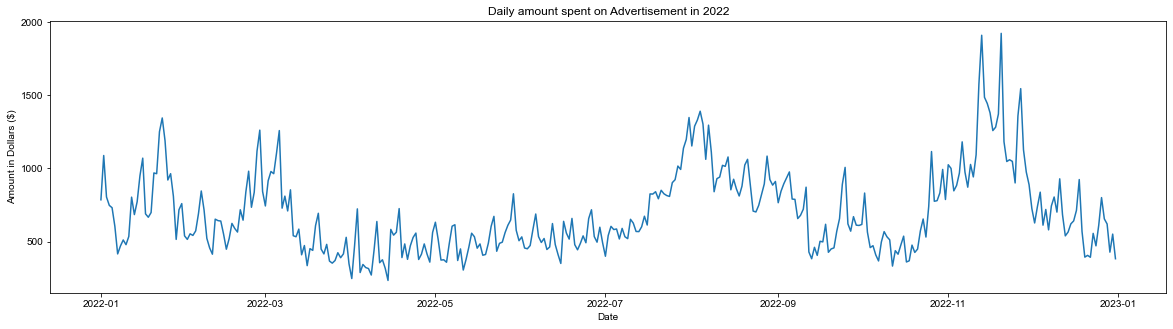

In [4]:
# Convert date column to datetime format and group data by date to get daily ad spend
adspend['event_date'] = pd.to_datetime(adspend['event_date'], format='%Y-%m-%d')
daily_adspend = adspend.groupby('event_date')['value_usd'].sum()
daily_adspend = daily_adspend.reset_index()
daily_adspend['value_usd'] = daily_adspend['value_usd'].astype(int)

# Create line plot of daily ad spend
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='value_usd', data=daily_adspend).set(title = "Daily amount spent on Advertisement in 2022", xlabel="Date", ylabel="Amount in Dollars ($)")
sns.set_theme(font_scale=2)

In [5]:
# Display maximum and minimum daily ad spend
print(f"Maximum amount spent, ${daily_adspend.value_usd.max()}.")
print(f"Minimum amount spent, ${daily_adspend.value_usd.min()}.")

Maximum amount spent, $1921.
Minimum amount spent, $236.


In [6]:
# Group daily ad spend by month
daily_adspend.groupby(daily_adspend["event_date"].dt.month)["value_usd"].sum().sort_values()

event_date
4     13220
5     15721
6     15842
10    17919
3     18706
2     19061
12    19569
9     19786
7     23296
1     24463
8     30738
11    35563
Name: value_usd, dtype: int32

In [7]:
# Display number of unique clients in adspend dataset
print(f"Number of unique clients: {adspend['client_id'].nunique()}")

Number of unique clients: 27


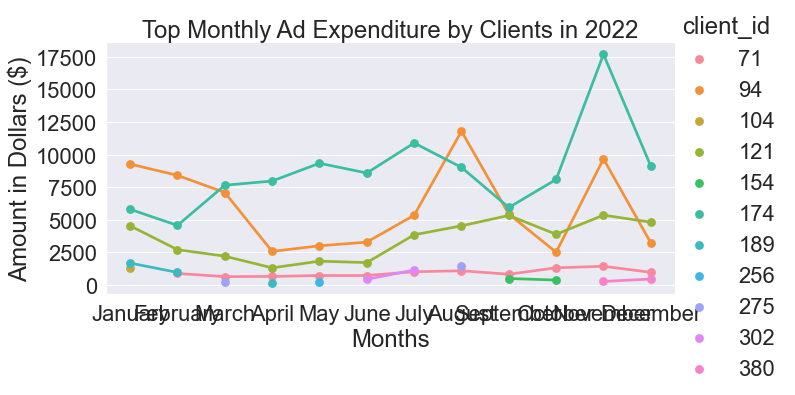

In [8]:
# Group monthly ad spend by client ID and month and select the top 5 clients for each month
adspend['event_date'] = pd.to_datetime(adspend['event_date'], format='%Y-%m-%d')
monthly_adspend_client = adspend.groupby([adspend["event_date"].dt.month,adspend["client_id"]])['value_usd'].sum().reset_index()
monthly_adspend_client["month"] = pd.to_datetime(monthly_adspend_client['event_date'], format='%m').dt.month_name()
monthly_adspend_client = monthly_adspend_client.sort_values(by=['event_date', 'value_usd'], ascending=True)
top5_adspend_client = monthly_adspend_client.groupby('event_date').apply(lambda x: x.nlargest(5, 'value_usd'))

# Create point plot of monthly ad spend by top 5 clients
sns.catplot(x='month', y='value_usd', hue='client_id', data=top5_adspend_client, kind='point', height=5, aspect=2)
plt.title("Top Monthly Ad Expenditure by Clients in 2022")
plt.xlabel("Months")
plt.ylabel("Amount in Dollars ($)")
sns.set_theme(font_scale=1)


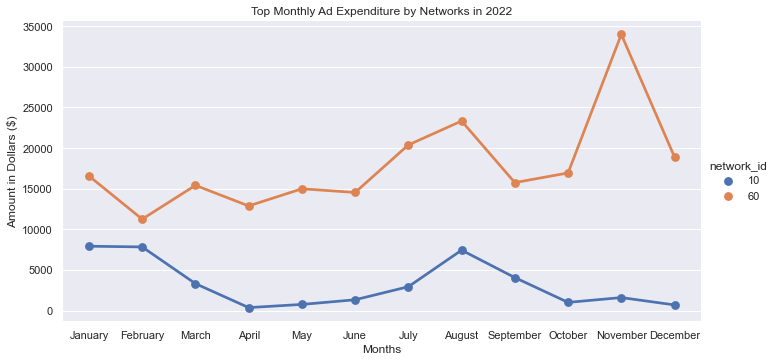

In [9]:

# Group by month and select the 2 network_ids for each month
monthly_adspend_net = adspend.groupby([adspend["event_date"].dt.month,adspend["network_id"]])['value_usd'].sum().reset_index()
monthly_adspend_net["month"] = pd.to_datetime(monthly_adspend_net['event_date'], format='%m').dt.month_name()
monthly_adspend_net = monthly_adspend_net.sort_values(by=['event_date', 'value_usd'], ascending=True)


# Plot the barplot using seaborn
sns.catplot(x='month', y='value_usd', hue='network_id', data=monthly_adspend_net, kind='point', height=5, aspect=2)
plt.title("Top Monthly Ad Expenditure by Networks in 2022")
plt.xlabel("Months")
plt.ylabel("Amount in Dollars ($)")
sns.set_theme(font_scale=1)


In [10]:
# Preview total amount spent on each network_id
monthly_adspend_net.groupby(["network_id"])["value_usd"].sum().sort_values().reset_index()
# 214838.614914/(214838.614914+39237.360885)



,network_id,value_usd
0,10,39237.360885
1,60,214838.614914


### INSTALLS

In [11]:
# View first few rows of installs dataset
installs.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11


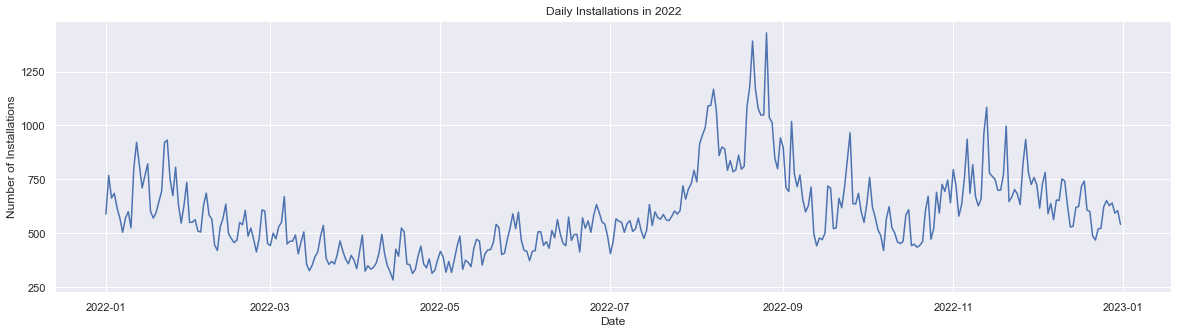

In [12]:
#Daily installation Count
installs['event_date'] = pd.to_datetime(installs['event_date'], format='%Y-%m-%d')
daily_install = installs.groupby('event_date')['install_id'].count()
daily_install = daily_install.reset_index()

# Plot daily installations
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='install_id', data=daily_install).set(title = "Daily Installations in 2022", xlabel="Date", ylabel="Number of Installations")
sns.set_theme(font_scale=2)

In [13]:
# Print the maximum and minimum installation count
print(f"Maximum install, {daily_install.install_id.max()}.")
print(f"Minimum install, {daily_install.install_id.min()}.")

Maximum install, 1430.
Minimum install, 283.


In [14]:
# Monthly Installs Analysis
daily_install.groupby(daily_install["event_date"].dt.month)["install_id"].sum().sort_values()

event_date
4     11342
5     13424
3     13518
2     14816
6     14906
10    17387
7     17844
12    19322
9     19945
1     21224
11    22732
8     30428
Name: install_id, dtype: int64

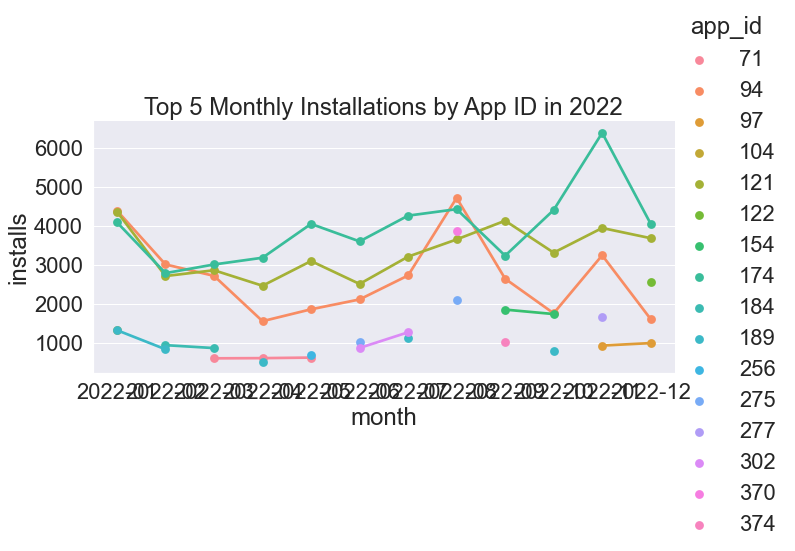

In [15]:
# Getting top 5 installs by App_IDs

monthly_appid_installs = pd.crosstab(installs['app_id'], pd.PeriodIndex(installs['event_date'], freq='M')).reset_index()

# Melt the dataframe to transform the columns into rows
monthly_appid_installs_melted = pd.melt(monthly_appid_installs, id_vars=['app_id'], var_name='month', value_name='installs')
monthly_appid_installs_melted
# Sort the values by month and downloads
monthly_appid_installs_sorted = monthly_appid_installs_melted.sort_values(by=['month', 'installs'], ascending=False)

# Group by month and select the top 5 app_ids for each month
top5_appid_installed = monthly_appid_installs_sorted.groupby('month').apply(lambda x: x.nlargest(5, 'installs'))


# Plot the barplot using seaborn
sns.catplot(x='month', y='installs', hue='app_id', data=top5_appid_installed, kind='point', height=5, aspect=2)
plt.title("Top 5 Monthly Installations by App ID in 2022")
sns.set_theme(font_scale=1)

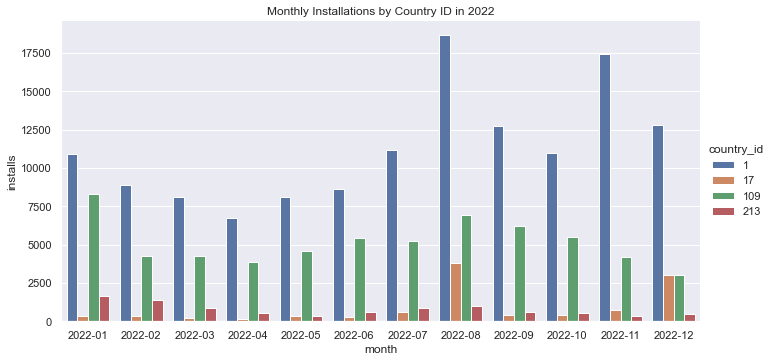

In [16]:
# Getting top 5 installs by country_id

monthly_countryid_installs = pd.crosstab(installs['country_id'], pd.PeriodIndex(installs['event_date'], freq='M')).reset_index()

# Melt the dataframe to transform the columns into rows
monthly_countryid_installs_melted = pd.melt(monthly_countryid_installs.copy(), id_vars=['country_id'], var_name='month', value_name='installs')

# Sort the values by month and downloads
monthly_countryid_installs_sorted = monthly_countryid_installs_melted.sort_values(by=['month', 'installs'], ascending=True)

# Group by month and select the top 5 app_ids for each month
top5_countryid_installed = monthly_countryid_installs_sorted.groupby('month').apply(lambda x: x.nlargest(5, 'installs'))


# Plot the barplot using seaborn
sns.catplot(x='month', y='installs', hue='country_id', data=top5_countryid_installed, kind='bar', height=5, aspect=2)
plt.title("Monthly Installations by Country ID in 2022")
sns.set_theme(font_scale=1)

In [17]:
installs["network_id"].value_counts()
# 73979/216888

60      110463
26       73979
10       26345
1111      6101
Name: network_id, dtype: int64

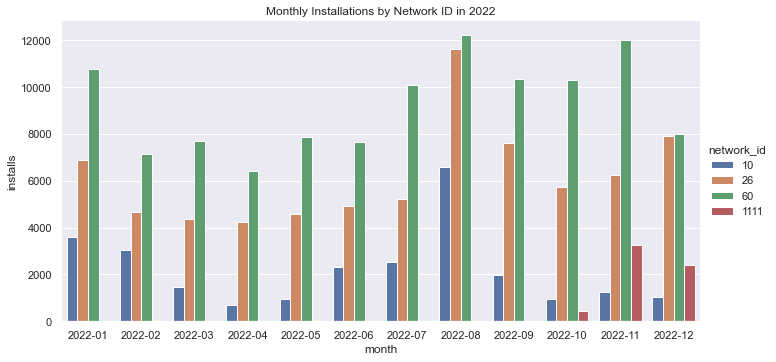

In [18]:
# Getting top 5 installs by network_id

monthly_network_id_installs = pd.crosstab(installs['network_id'], pd.PeriodIndex(installs['event_date'], freq='M')).reset_index()

# Melt the dataframe to transform the columns into rows
monthly_network_id_installs_melted = pd.melt(monthly_network_id_installs, id_vars=['network_id'], var_name='month', value_name='installs')

# Sort the values by month and downloads
monthly_network_id_installs_sorted = monthly_network_id_installs_melted.sort_values(by=['month', 'installs'], ascending=True)

# Group by month and select the top 5 app_ids for each month
top5_network_id_installed = monthly_network_id_installs_sorted.groupby('month').apply(lambda x: x.nlargest(5, 'installs'))


# Plot the barplot using seaborn
sns.catplot(x='month', y='installs', hue='network_id', data=top5_network_id_installed, kind='bar', height=5, aspect=2)
plt.title("Monthly Installations by Network ID in 2022")
sns.set_theme(font_scale=1)

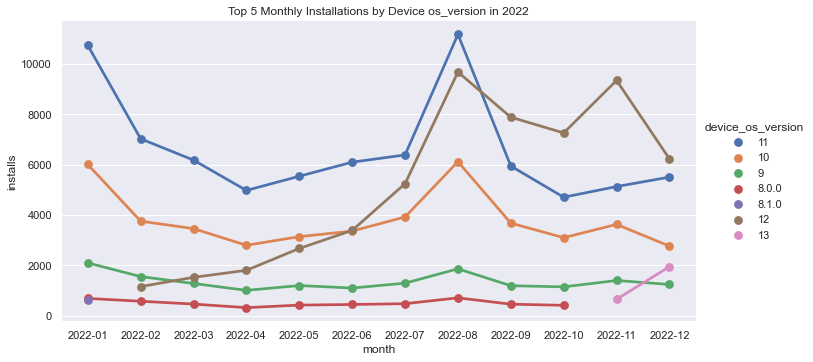

In [19]:
# Getting top 5 installs by device_os_version

monthly_device_installs = pd.crosstab(installs['device_os_version'], pd.PeriodIndex(installs['event_date'], freq='M')).reset_index()

# Melt the dataframe to transform the columns into rows
monthly_device_installs_melted = pd.melt(monthly_device_installs, id_vars=['device_os_version'], var_name='month', value_name='installs')
monthly_device_installs_melted
# Sort the values by month and downloads
monthly_device_installs_sorted = monthly_device_installs_melted.sort_values(by=['month', 'installs'], ascending=False)

# Group by month and select the top 5 app_ids for each month
top5_device_installed = monthly_device_installs_sorted.groupby('month').apply(lambda x: x.nlargest(5, 'installs'))


# Plot the barplot using seaborn
sns.catplot(x='month', y='installs', hue='device_os_version', data=top5_device_installed, kind='point', height=5, aspect=2)
plt.title("Top 5 Monthly Installations by Device os_version in 2022")
sns.set_theme(font_scale=1)

### PAYOUTS

In [20]:
payouts.describe()

,value_usd
count,52003.000000
mean,1.198410
std,2.414285
min,0.199860
25%,0.280400
50%,0.358836
75%,0.708659
max,28.507500


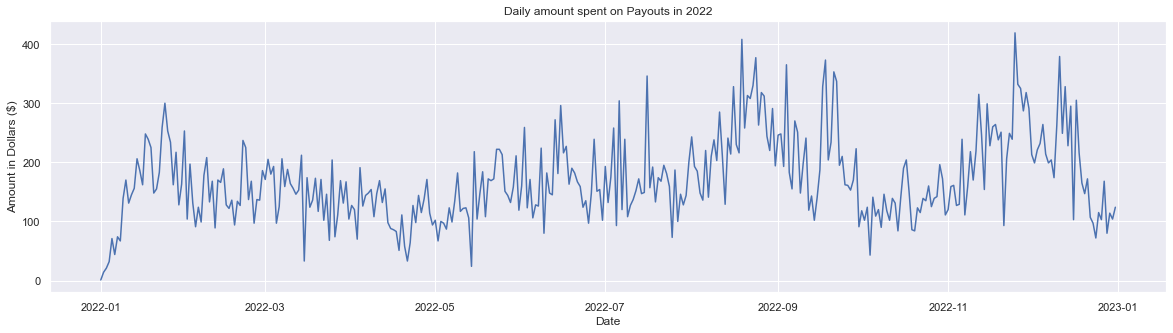

In [21]:
#Amount spent daily on Payouts
payouts['event_date'] = pd.to_datetime(payouts['event_date'], format='%Y-%m-%d')
daily_payouts = payouts.groupby('event_date')['value_usd'].sum()
daily_payouts = daily_payouts.reset_index()
daily_payouts['value_usd'] = daily_payouts['value_usd'].astype(int)

# Create line plot of daily Payouts
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='value_usd', data=daily_payouts).set(title = "Daily amount spent on Payouts in 2022", xlabel="Date", ylabel="Amount in Dollars ($)")
sns.set_theme(font_scale=2)

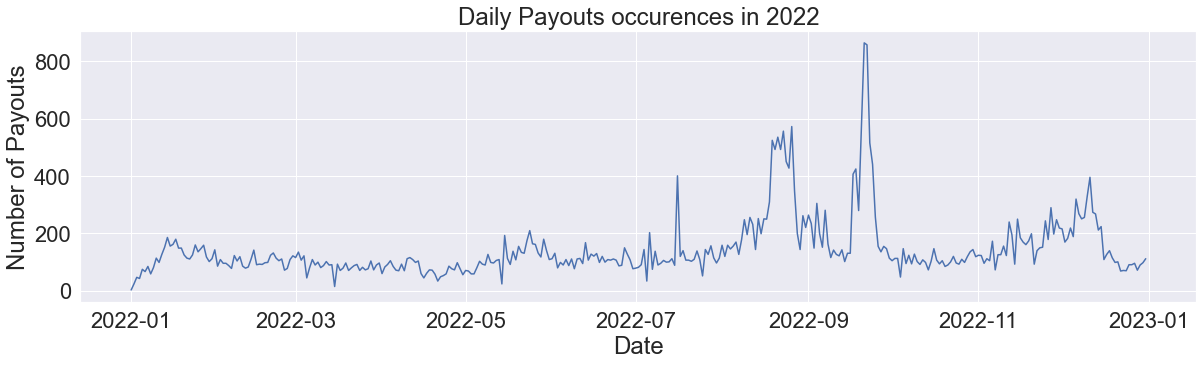

In [22]:
#Daily Payout Count
payouts['event_date'] = pd.to_datetime(payouts['event_date'], format='%Y-%m-%d')
daily_payouts_installs = payouts.groupby('event_date')['install_id'].count()
daily_payouts_installs = daily_payouts_installs.reset_index()

# Create Barplot of daily Payout Count
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='install_id', data=daily_payouts_installs).set(title = "Daily Payouts occurences in 2022", xlabel="Date", ylabel="Number of Payouts")
sns.set_theme(font_scale=2)

In [23]:
 # Monthly Ad Analysis
monthly_payouts = daily_payouts.groupby(daily_adspend["event_date"].dt.month)["value_usd"].sum().sort_values()
monthly_payouts

event_date
4     3464
10    3978
2     4111
5     4330
3     4559
1     4786
6     5055
7     5190
12    5854
9     6383
11    6825
8     7607
Name: value_usd, dtype: int32

### REVENUE

In [24]:
revenue.head()

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400


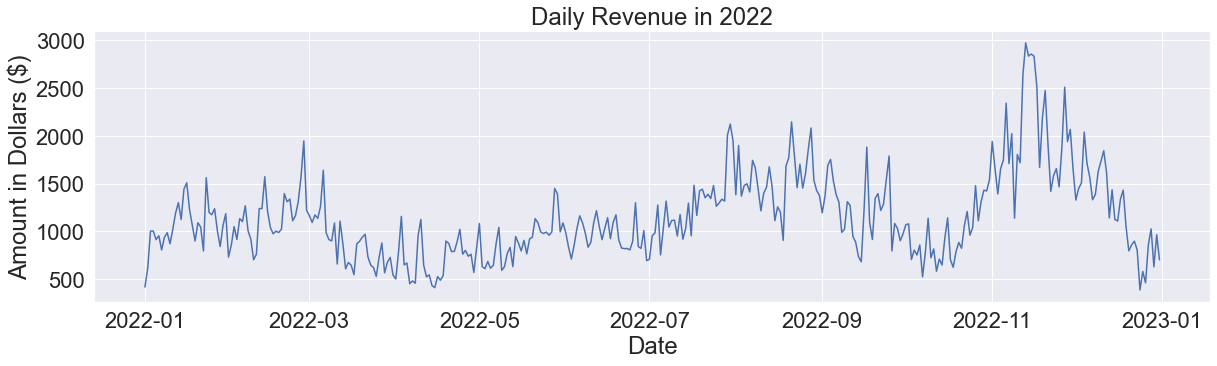

In [25]:
# Amount earned daily on Revenue
revenue['event_date'] = pd.to_datetime(revenue['event_date'], format='%Y-%m-%d')
daily_revenue = revenue.groupby('event_date')['value_usd'].sum()
daily_revenue = daily_revenue.reset_index()
daily_revenue['value_usd'] = daily_revenue['value_usd'].astype(int)

# Create line plot on daily Revenue
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='value_usd', data=daily_revenue).set(title = "Daily Revenue in 2022", xlabel="Date", ylabel="Amount in Dollars ($)")
sns.set_theme(font_scale=2)

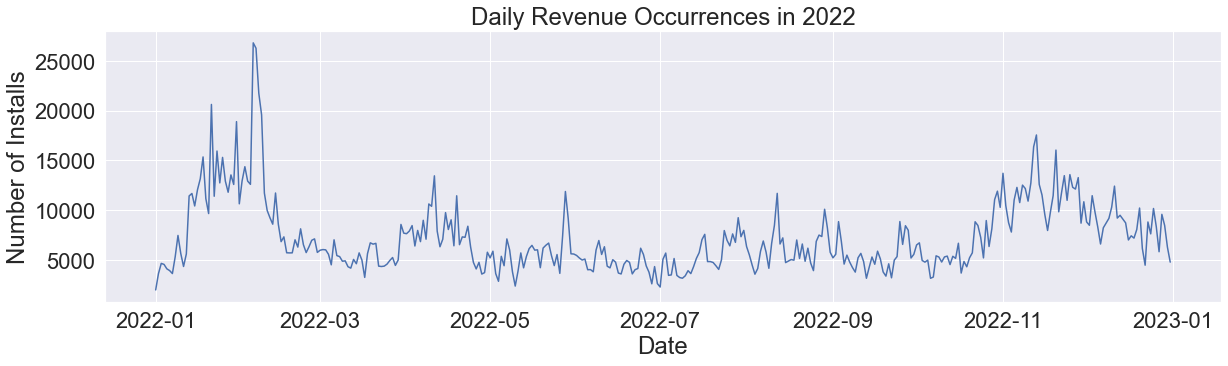

In [26]:
# Daily Revenue Count
revenue['event_date'] = pd.to_datetime(revenue['event_date'], format='%Y-%m-%d')
daily_revenue_count = revenue.groupby('event_date')['install_id'].count()
daily_revenue_count = daily_revenue_count.reset_index()

# Create line plot on Daily Revenue count
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='event_date', y='install_id', data=daily_revenue_count).set(title = "Daily Revenue Occurrences in 2022", xlabel="Date", ylabel="Number of Installs")
sns.set_theme(font_scale=2)

## CROSS-REFERENCING MULTIPLE DATASETS TO IDENTIFY COMMON TRENDS

In [27]:
# Join daily revenue, payouts, and ad spend dataframes based on event_date
daily_revenue_cost = daily_revenue.set_index("event_date").join(daily_payouts.set_index('event_date'),rsuffix="_payouts").join(daily_adspend.set_index('event_date'),rsuffix="_adspend").reset_index()
daily_revenue_cost.columns = ["event_date","daily_revenue","daily_payouts", "daily_adspend"]

### EVALUATING REVENUE - ADSPEND AS COST

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

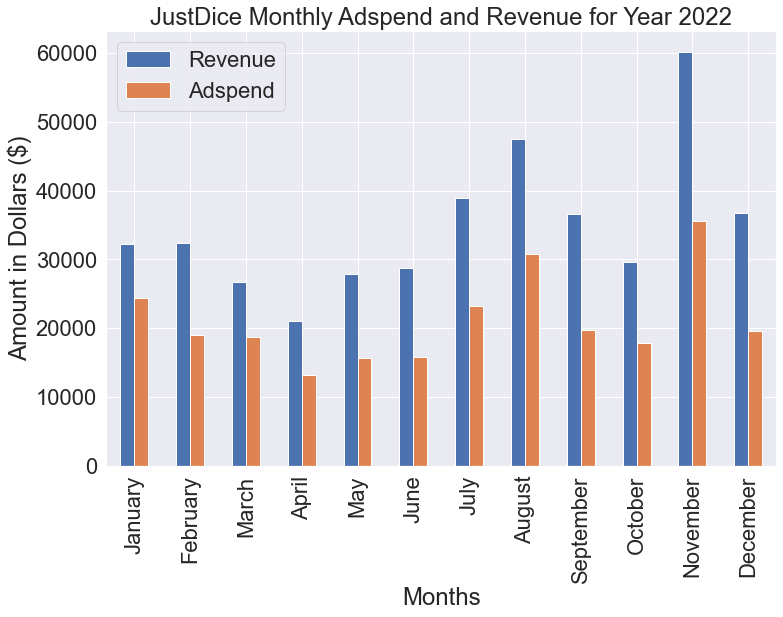

In [28]:
# Create a new dataframe with only revenue and ad spend columns
daily_revenue_adspend = daily_revenue_cost.copy()
daily_revenue_adspend = daily_revenue_adspend[["event_date","daily_revenue","daily_adspend"]]
daily_revenue_adspend.set_index('event_date', inplace=True)

# resample the data by month to calculate the total cost and revenue for each month
monthly_revenue_adspend = daily_revenue_adspend.resample('M').sum()

# create a bar plot using seaborn and pandas
sns.set_style('darkgrid')
ax = monthly_revenue_adspend.plot(kind='bar', figsize=(12, 8))
ax.set_title('JustDice Monthly Adspend and Revenue for Year 2022')
ax.set_xlabel('Months')
ax.set_ylabel('Amount in Dollars ($)')
ax.legend(['Revenue', 'Adspend'])

# modify x-axis labels to show the month names
month_labels = [pd.to_datetime(str(i)).strftime('%B') for i in monthly_revenue_adspend.index]
ax.set_xticklabels(month_labels)


### EVALUATING REVENUE - (ADSPEND + PAYOUTS) AS COST

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

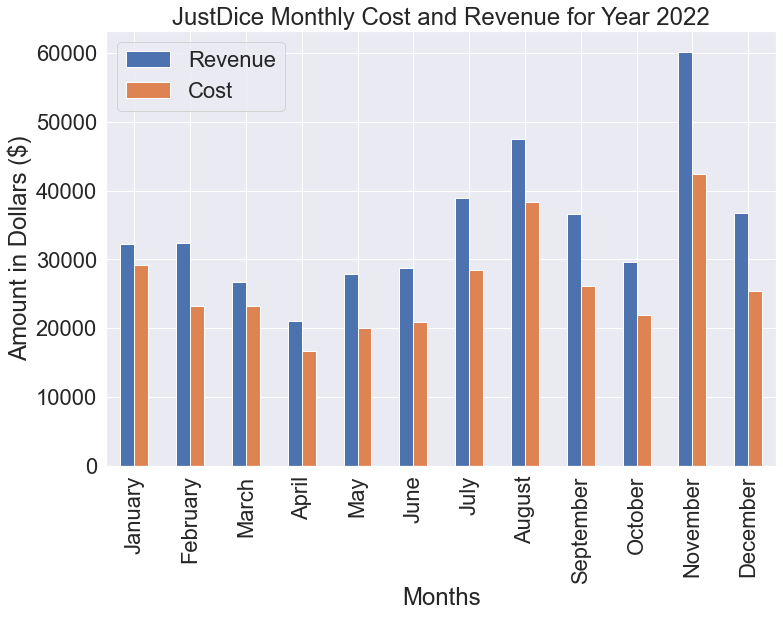

In [29]:
# Create a new dataframe with revenue, payouts as cost columns
monthly_revenue_cost = daily_revenue_cost.copy()
monthly_revenue_cost["daily_cost"] = monthly_revenue_cost["daily_adspend"]+monthly_revenue_cost["daily_payouts"]
monthly_revenue_cost = monthly_revenue_cost[["event_date","daily_revenue","daily_cost"]]
monthly_revenue_cost.set_index('event_date', inplace=True)

# resample the data by month to calculate the total cost and revenue for each month
monthly_revenue_cost = monthly_revenue_cost.resample('M').sum()

# create a bar plot using seaborn and pandas
sns.set_style('darkgrid')
ax = monthly_revenue_cost.plot(kind='bar', figsize=(12, 8))
ax.set_title('JustDice Monthly Cost and Revenue for Year 2022')
ax.set_xlabel('Months')
ax.set_ylabel('Amount in Dollars ($)')
ax.legend(['Revenue', 'Cost'])

# modify x-axis labels to show the month names
month_labels = [pd.to_datetime(str(i)).strftime('%B') for i in monthly_revenue_cost.index]
ax.set_xticklabels(month_labels)

In [30]:
# STATS
# Calculate monthly profit and profit percentage
monthly_revenue_cost["profit"] = monthly_revenue_cost["daily_revenue"]-monthly_revenue_cost["daily_cost"]
monthly_revenue_cost["profit_percentage"] = monthly_revenue_cost["profit"]/monthly_revenue_cost["daily_cost"]

# Sort dataframe by profit in ascending order
monthly_revenue_cost.sort_values(by="profit").reset_index()

,event_date,daily_revenue,daily_cost,profit,profit_percentage
0,2022-01-31,32210,29249,2961,0.101234
1,2022-03-31,26793,23265,3528,0.151644
2,2022-04-30,21065,16684,4381,0.262587
3,2022-10-31,29646,21897,7749,0.353884
4,2022-05-31,27853,20051,7802,0.389108
5,2022-06-30,28751,20897,7854,0.375843
6,2022-08-31,47491,38345,9146,0.238519
7,2022-02-28,32371,23172,9199,0.396988
8,2022-09-30,36543,26169,10374,0.396423
9,2022-07-31,39005,28486,10519,0.369269


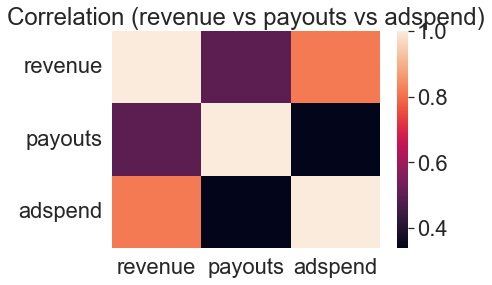

In [31]:
# View Correlation between revenue, payouts, adspend Columns
corr_revenue = daily_revenue_cost.copy()
corr_revenue.columns = ["event_date","revenue","payouts", "adspend"]
corr = corr_revenue.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns).set(title= "Correlation (revenue vs payouts vs adspend)")
sns.set_theme(font_scale=1.5)

### EVALUATING Installs vs Adspend

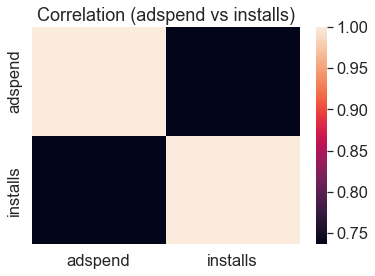

In [32]:
# Join daily ad spend and installs dataframes based on event_date
daily_adspend_install = daily_adspend.set_index("event_date").join(daily_install.set_index('event_date'),rsuffix="_install").reset_index()
daily_adspend_install.columns = ["event_date","adspend", "installs"]
corr = daily_adspend_install.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns).set(title= "Correlation (adspend vs installs)")
sns.set_theme(font_scale=1.5)

<sub><sup>© Praise Taiwo | April 2023 | praisetaiw@gmail.com</sup></sub>
